In [1]:
import scipy.io
import keras
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import random 
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, UpSampling2D

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline 



/Users/liginsolamen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_msgpack('/Users/liginsolamen/MRE/MREData/MREdata_072118.msg')

In [3]:
Ur=np.stack(df.Ur.values,axis=3).transpose(3,0,1,2)
Ui=np.stack(df.Ui.values,axis=3).transpose(3,0,1,2)

X=np.sqrt(Ui**2+Ur**2)

Y=np.stack(df.RS.values,axis=2).transpose(2,0,1)
Y=Y.reshape(612,-1)
Y=Y/10000
print(X.shape)
print(Y.shape)
#print(Y.ptp)
Y.ptp()

(612, 64, 64, 3)
(612, 4096)


1.0

In [125]:
#scaler = MinMaxScaler()
#print(scaler.fit(Y))

In [4]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3)
train_X,valid_X,train_Y,valid_Y=train_test_split(train_X,train_Y,test_size=0.3)

print(X.shape) #612,64,64,3
print(Y.shape) #612,4096
print(train_X.shape) #(299, 64, 64, 3)
print(valid_X.shape) #(129, 64, 64, 3)
print(test_Y.shape) #(184, 4096)



(612, 64, 64, 3)
(612, 4096)
(299, 64, 64, 3)
(129, 64, 64, 3)
(184, 4096)


In [148]:
model=Sequential()

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1),
                 activation='relu',
                 input_shape=(X.shape[1],X.shape[2],X.shape[3])))
#32 Output channels
#Input Shape=64,64,3
#5x5 moving window
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#64 output channels
#default strides=1,1
#batch size=64,64,32          

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(Y.shape[1],activation='linear'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_80 (Dense)             (None, 4096)              413696    
Total para

In [149]:
model.compile(loss='mean_squared_error',
              optimizer='adam')


In [150]:
model.fit(train_X, train_Y,
          epochs=10,
          batch_size=1,
          validation_data=(valid_X, valid_Y))

Train on 299 samples, validate on 129 samples
Epoch 1/10
299/299 [==============================] - 9s 30ms/step - loss: 0.0256 - val_loss: 0.0297
Epoch 2/10
299/299 [==============================] - 9s 30ms/step - loss: 0.0139 - val_loss: 0.0094
Epoch 3/10
299/299 [==============================] - 10s 32ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 4/10
299/299 [==============================] - 9s 31ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 5/10
299/299 [==============================] - 9s 29ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 6/10
299/299 [==============================] - 9s 30ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 7/10
299/299 [==============================] - 9s 30ms/step - loss: 0.0046 - val_loss: 0.00

In [153]:
#y_predict=model.predict(test_X).reshape(test_X.shape[0],64,64)

y_predict=model.predict(test_X)
#test_Y=test_Y.reshape(test_Y.shape[0],64,64)
print(y_predict.shape)
y_predit2=y_predict.reshape(y_predict.shape[0],64,64)
print(y_predit2.shape)



(184, 4096)
(184, 64, 64)


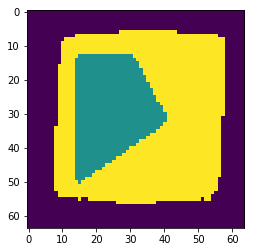

In [154]:
plt.imshow(ytest[32])

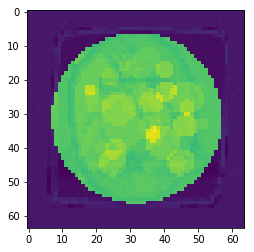

In [155]:
plt.imshow(y_predit2[32])

In [159]:
model=Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2),
                 activation='relu',
                 input_shape=(X.shape[1],X.shape[2],X.shape[3])))
#32 Output channels
#Input Shape=64,64,3
#5x5 moving window
model.add(Conv2D(50, kernel_size=(3, 3), strides=(2,2),
                 activation='relu'))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(2,2),
                 activation='relu'))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(2,2),
                 activation='relu'))


model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))

# model.add(MaxPooling2D(pool_size=(3,3)))
# #64 output channels
# #default strides=1,1
# #batch size=64,64,32          

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(Y.shape[1],activation='linear'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 31, 31, 64)        1792      
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 15, 15, 50)        28850     
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 7, 7, 32)          14432     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 1, 1, 32)          9248      
_________________________________________________________________
flatten_29 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 100)               3300      
__________

In [160]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

model.fit(train_X, train_Y,
          epochs=10,
          batch_size=1,
          validation_data=(valid_X, valid_Y))

Train on 299 samples, validate on 129 samples
Epoch 1/10
299/299 [==============================] - 6s 22ms/step - loss: 0.0259 - val_loss: 0.0218
Epoch 2/10
299/299 [==============================] - 5s 18ms/step - loss: 0.0197 - val_loss: 0.0161
Epoch 3/10
299/299 [==============================] - 6s 18ms/step - loss: 0.0111 - val_loss: 0.0064
Epoch 4/10
299/299 [==============================] - 5s 18ms/step - loss: 0.0061 - val_loss: 0.0076
Epoch 5/10
299/299 [==============================] - 5s 18ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 6/10
299/299 [==============================] - 6s 19ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 7/10
299/299 [==============================] - 5s 18ms/step - loss: 0.0042 - val_loss: 0.00

(184, 4096)
(184, 64, 64)


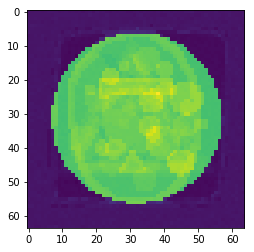

In [161]:
y_predict=model.predict(test_X)
#test_Y=test_Y.reshape(test_Y.shape[0],64,64)
print(y_predict.shape)
y_predit2=y_predict.reshape(y_predict.shape[0],64,64)
print(y_predit2.shape)
plt.imshow(ytest[32])
plt.imshow(y_predit2[32])

In [5]:
#Autoencoder

model=Sequential()

#Convolution
model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2),padding="same",
                 activation='relu',
                 input_shape=(X.shape[1],X.shape[2],X.shape[3])))

model.add(Conv2D(50, kernel_size=(3, 3), strides=(2,2),padding="same",
                 activation='relu'))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(2,2),padding="same",
                 activation='relu'))

model.add(Conv2D(32, kernel_size=(3, 3),padding="same",
                 activation='relu'))

model.add(Conv2D(32, kernel_size=(3, 3),padding="same",
                 activation='relu'))

#Deconvolution
# model.add(Conv2D(32, kernel_size=(3, 3),padding='same',
#                  activation='relu'))

model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',
                 activation='relu'))

model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',
                 activation='relu'))

model.add(UpSampling2D((2,2)))

model.add(Conv2D(1, kernel_size=(3, 3),padding='same',
                 activation='relu'))


# model.add(UpSampling2D((2,2)))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(Y.shape[1],activation='linear'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        28850     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          14432     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [6]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

train_Y=train_Y.reshape((train_Y.shape[0],64,64,1))
valid_Y=valid_Y.reshape((valid_Y.shape[0],64,64,1))


history=model.fit(train_X, train_Y,
          epochs=100,
          batch_size=1,
          validation_data=(valid_X, valid_Y))

Train on 299 samples, validate on 129 samples
Epoch 1/100
299/299 [==============================] - 10s 34ms/step - loss: 0.0290 - val_loss: 0.0222
Epoch 2/100
299/299 [==============================] - 10s 33ms/step - loss: 0.0229 - val_loss: 0.0196
Epoch 3/100
299/299 [==============================] - 12s 39ms/step - loss: 0.0184 - val_loss: 0.0164
Epoch 4/100
299/299 [==============================] - 11s 38ms/step - loss: 0.0142 - val_loss: 0.0120
Epoch 5/100
299/299 [==============================] - 9s 29ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 6/100
299/299 [==============================] - 9s 29ms/step - loss: 0.0093 - val_loss: 0.0072
Epoch 7/100
299/299 [==============================] - 10s 32ms/step - loss: 0.0080 - va

(184, 64, 64, 1)
(184, 64, 64)


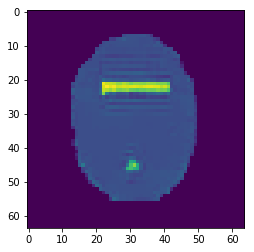

In [63]:
y_predict=model.predict(test_X)
test_Y=test_Y.reshape(test_Y.shape[0],64,64)
print(y_predict.shape)
y_predit2=y_predict.reshape(y_predict.shape[0],64,64)
print(y_predit2.shape)
plt.imshow(test_Y[13])
plt.imshow(y_predit2[13])

In [66]:
Out[6]

In [72]:
Out[6].'loss'

SyntaxError: invalid syntax (<ipython-input-72-98ee1186444d>, line 1)

1. Increase neurons
2. Train longer (epochs)
3. 